In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree
import sklearn
import warnings
from sklearn import linear_model
from sklearn import svm

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/site-packages/OpenSSL/_util.py:6: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography and will be removed in a future release.
  from cryptography.hazmat.bindings.openssl.binding import Binding


In [3]:
data = pd.read_csv('features.csv')
data

,0,4,13418,16481,0,1252,19023,459,477,176,182,15.19408945686901,50,6214,15900,2
0,0,4,50,38,0,2884,594,732,2318,270,809,0.205964,4.000000,2.509100e+04,2.318000e+03,1.000000
1,0,4,1334,2119,0,2849,4953,6,7,3,3,1.738505,122.000000,5.620000e+02,2.000000e+02,66.000000
2,0,4,12,1030,0,2004,2092,64,69,121,115,1.043912,24.000000,2.450000e+03,2.550000e+02,10.000000
3,0,4,199,2105,0,1769,1839,3306,3463,1527,1571,1.039570,84.000000,2.796000e+03,6.968000e+03,33.000000
4,0,4,91,2131,0,274,4036,50,53,6,7,14.729927,260.572965,1.320940e+06,1.898647e+03,64.161182
5,0,4,283,37305,0,3630,73079,6135,6289,3961,4115,20.131956,351.839146,8.964649e+05,3.988318e+05,63.649293
6,0,4,30,2857857,1,1499,7299,70714,73311,19395,19933,4.869246,347.827837,3.544484e+06,1.100092e+07,40.000201
7,0,4,21,7144,0,750,8114,1115,1120,1332,1331,10.818667,261.563268,2.087849e+05,8.178923e+04,42.704207
8,0,4,183,520,0,3004,29481,2,4,2,3,9.813915,248.287043,2.528690e+06,4.180343e+01,183.681741
9,0,4,147,204,0,3167,25482,2520,2852,8927,9670,8.046100,430.519991,3.056822e+06,8.471941e+03,309.368637


In [3]:
data = pd.read_csv('/home/florian/PycharmProjects/untitled/Q1-2019/features2.csv')
data

,ot_weekday,userfriends,userfollowers,userverified,account_age,usertweets,favcount,tweetfavorite,rtcount,tweetretweet,tw_p_day,past_tw_c,past_rt_c,past_li_c,past_mentions
0,4,905,1678563,1,2515,18671,101264,101457,43243,43129,7.423857,156.000000,4.021460e+05,1.004753e+06,44.000000
0,4,13418,16481,0,1252,19023,459,477,176,182,15.194089,50.000000,6.214000e+03,1.590000e+04,2.000000
0,4,50,38,0,2884,594,732,2318,270,809,0.205964,4.000000,2.509300e+04,2.318000e+03,1.000000
0,4,1335,2119,0,2849,4955,6,7,3,3,1.739207,122.000000,5.620000e+02,2.000000e+02,66.000000
0,4,12,1029,0,2004,2092,64,69,121,115,1.043912,24.000000,2.450000e+03,2.550000e+02,10.000000
0,4,93,2132,0,274,4037,50,53,6,7,14.733577,260.572965,1.320948e+06,1.898647e+03,64.161182
0,4,283,37307,0,3630,73079,6135,6289,3961,4115,20.131956,351.839146,8.964667e+05,3.988318e+05,63.649293
0,4,30,2857928,1,1500,7304,70714,73328,19395,19937,4.869333,347.827837,3.544635e+06,1.100161e+07,40.000201
0,4,378,8015,0,2074,55454,403,593,1613,2407,26.737705,659.558669,1.060074e+06,4.202137e+03,312.780400
0,4,5042,371240,1,3515,95029,4500,5798,18503,22395,27.035277,796.015972,3.559783e+05,1.277048e+05,378.107587


In [4]:
# Neural Network
y = (data.tweetretweet>=data.tweetretweet.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)

X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
180685/180685 [==============================] - 10s 58us/step - loss: 0.4231 - acc: 0.8012
Epoch 2/5
180685/180685 [==============================] - 11s 61us/step - loss: 0.3725 - acc: 0.8283
Epoch 3/5
180685/180685 [==============================] - 11s 61us/step - loss: 0.3534 - acc: 0.8378
Epoch 4/5
180685/180685 [==============================] - 10s 54us/step - loss: 0.3406 - acc: 0.8445
Epoch 5/5
180685/180685 [==============================] - 9s 49us/step - loss: 0.3285 - acc: 0.8502


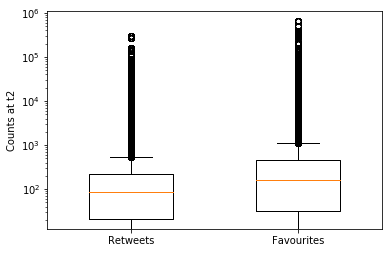

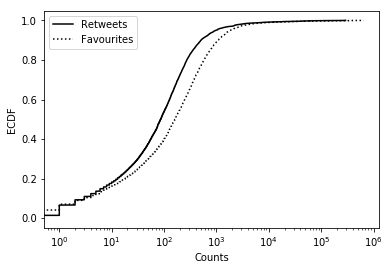

[ 32. 162. 460.] [ 21.  86. 223.]
647936 293345
[ 25. 129. 337.] [ 17.  71. 167.]
1068 507


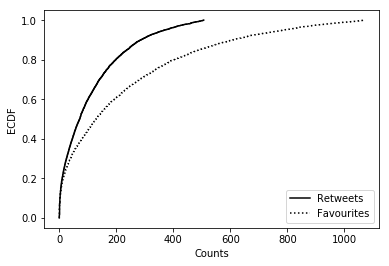

In [46]:
# Plots
rts = list(data.rtcount)
favs = list(data.favcount)

# Retweet/Favourite Distributions
plt.boxplot([rts, favs], widths=(0.5, 0.5))
plt.xticks((1, 2), ("Retweets", "Favourites"))
plt.yscale('log')
plt.ylabel("Counts at t2")
plt.savefig('counts_box.png')
plt.show()


# Retweet/Favourite ECDFs
p1 = plt.plot(np.sort(rts), np.linspace(0, 1, len(rts), endpoint=False), "k")
p2 = plt.plot(np.sort(favs), np.linspace(0, 1, len(favs), endpoint=False), "k:")
plt.legend((p1[0], p2[0]), ("Retweets", "Favourites"))
plt.xlabel("Counts")
plt.ylabel("ECDF")
plt.xscale("log")
plt.savefig('counts_ecdf.pdf')
plt.show()

# Retweet/Favourite <90th percentile
fperc = np.percentile(favs, 90)
rperc = np.percentile(rts, 90)
favs_new = [x for x in favs if x < fperc]
rts_new = [x for x in rts if x < rperc]

# Retweet/Favourite quantiles
qfav = np.quantile(favs, [0.25, 0.5, 0.75])
qrts = np.quantile(rts, [0.25, 0.5, 0.75])
print(qfav, qrts)
print(max(favs), max(rts))

# Retweet/Favourite <90th percentile quantiles
qfav_new = np.quantile(favs_new, [0.25, 0.5, 0.75])
qrts_new = np.quantile(rts_new, [0.25, 0.5, 0.75])
print(qfav_new, qrts_new)
print(max(favs_new), max(rts_new))

# Retweet/Favourite <90th percentile ECDFs
p1 = plt.plot(np.sort(rts_new), np.linspace(0, 1, len(rts_new), endpoint=False), "k")
p2 = plt.plot(np.sort(favs_new), np.linspace(0, 1, len(favs_new), endpoint=False), "k:")
plt.legend((p1[0], p2[0]), ("Retweets", "Favourites"))
plt.xlabel("Counts")
# plt.xscale("log")
plt.ylabel("ECDF")
plt.savefig('counts90_ecdf.pdf')
plt.show()

In [11]:
def logistic(x, n):
    n *= 1.0
    # return 1/ (1 + np.exp(-((x-n/2)/(n/(2*5)) )))
    return 1/ (1 + np.exp(- (x-n/2 ) / (n/(2*5)) ))

# Rescaling - Filtering on <90th
XX = data[data.rtcount < max(rts_new)]
XX = XX[XX.tweetfavorite < max(favs_new)]
XX

# Rescaling - Get Scalings
cols = 'userfriends', 'userfollowers', 'account_age', 'usertweets', 'tw_p_day', 'past_tw_c', 'past_rt_c', 'past_li_c', 'past_mentions'
scalings = [(col, max(XX[col])) for col in cols]
scalings

# Rescaling itself
X_new = data
for col in scalings:
    print(col)
    X_new[col[0]] = X_new[col[0]].apply(lambda x: logistic(x, col[1]))
    
X_new

('userfriends', 2220137)
('userfollowers', 77295195)
('account_age', 4641)
('usertweets', 5618948)
('tw_p_day', 2223.564701226751)
('past_tw_c', 604800.0)
('past_rt_c', 3522329353.2403607)
('past_li_c', 267321600.00000003)
('past_mentions', 231698.0281690141)


,ot_weekday,userfriends,userfollowers,userverified,account_age,usertweets,favcount,tweetfavorite,rtcount,tweetretweet,tw_p_day,past_tw_c,past_rt_c,past_li_c,past_mentions
0,4,0.006720,0.008303,1,0.603266,0.006917,101264,101457,43243,43129,0.006919,0.006710,0.006700,0.006947,0.006705
0,4,0.007107,0.006707,0,0.090932,0.006922,459,477,176,182,0.007163,0.006698,0.006693,0.006697,0.006693
0,4,0.006694,0.006693,0,0.771037,0.006700,732,2318,270,809,0.006699,0.006693,0.006693,0.006693,0.006693
0,4,0.006733,0.006695,0,0.757452,0.006752,6,7,3,3,0.006745,0.006706,0.006693,0.006693,0.006712
0,4,0.006693,0.006694,0,0.335823,0.006718,64,69,121,115,0.006724,0.006695,0.006693,0.006693,0.006696
0,4,0.006696,0.006695,0,0.012014,0.006741,50,53,6,7,0.007148,0.006722,0.006718,0.006693,0.006711
0,4,0.006701,0.006725,0,0.943831,0.007615,6135,6289,3961,4115,0.007322,0.006732,0.006710,0.006793,0.006711
0,4,0.006694,0.009658,1,0.145799,0.006780,70714,73328,19395,19937,0.006840,0.006731,0.006760,0.010066,0.006704
0,4,0.006704,0.006700,0,0.370252,0.007382,403,593,1613,2407,0.007542,0.006766,0.006713,0.006694,0.006783
0,4,0.006846,0.007020,1,0.929156,0.007916,4500,5798,18503,22395,0.007552,0.006781,0.006700,0.006725,0.006802


0.9784858558615066
Feature ranking:
1. feature 6 (0.366871)
2. feature 11 (0.189174)
3. feature 9 (0.108805)
4. feature 2 (0.056792)
5. feature 7 (0.056292)
6. feature 12 (0.046055)
7. feature 1 (0.040226)
8. feature 10 (0.036439)
9. feature 4 (0.036412)
10. feature 8 (0.022734)
11. feature 5 (0.022547)
12. feature 0 (0.015535)
13. feature 3 (0.002119)


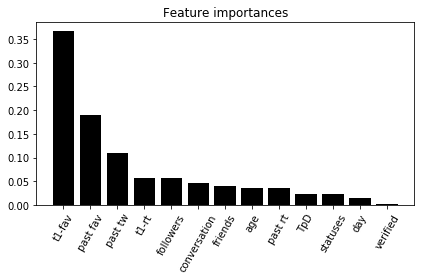

In [64]:
# ot_weekday userfriends userfollowers userverified account_age usertweets favcount rtcount tw_p_day past_tw_c past_rt_c past_li_c past_mentions
#     0          1           2              3            4           5        6      7          8        9         10        11       12         
# 'day',     'friends',  'followers',   'verified',    'age',   'statuses''t1-fav''t1-rt'   'TpD'   'past tw' 'past rt' 'past fav' 'conversation'
# Decision Tree
y = (data.tweetfavorite>=data.tweetfavorite.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
# print(sklearn.metrics.accuracy_score(y_test, pred))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="black", align="center")
# plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(13), ('t1-fav', 'past fav', 'past tw', 't1-rt', 'followers', 'conversation', 'friends', 'age', 'past rt', 'TpD', 'statuses', 'day', 'verified'), rotation=60)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig('feature_imp_fav.pdf')
plt.show()

In [34]:
# SVM
y = (data.tweetretweet>=data.tweetretweet.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

svc = svm.SVC()
svc.fit(X_train[:10000], y_train[:10000])

pred = svc.predict(X_test)
print(svc.score(X_test, y_test))
# print(sklearn.metrics.accuracy_score(y_test, pred))
# svc.feature_importances_

0.7286583453553284


In [5]:
# Logistic Regression
y = (data.tweetretweet>=data.tweetretweet.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(lr.score(X_test, y_test))
# print(sklearn.metrics.accuracy_score(y_test, pred))
# lr.feature_importances_

0.7817537477262748


In [7]:
# 2 Class, Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

y = (data.tweetretweet>=data.tweetretweet.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

0.9830646678793201
0.7908172865834535
0.7394781408768739


In [10]:
# 2 Class, No Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

y = (data.tweetretweet>=data.tweetretweet.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
# X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

0.9833469234146648
0.7581383679357712
0.538888540425265


In [12]:
# 2 Class, <90th
rts = data.tweetretweet
rts_perc = np.percentile(rts, 90)
print(rts_perc)

rts_lower = [x for x in rts if x < rts_perc]
qs_lower = np.quantile(rts_lower, [0.25, 0.5, 0.75])
print(qs_lower)

# model generation
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

y = (data.tweetretweet>=qs_lower[1]) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

18053.0
[ 100.  615. 2722.]
0.976666875744841
0.8019193376403437
0.7292855798783165


In [26]:
# 4 Class, No Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3

rts = list(data.tweetretweet)
qs = np.quantile(rts, [0.25, 0.5, 0.75])
print(qs)
y = [label(qs, x) for x in data.tweetretweet]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
# X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

[ 129.  863. 4461.]
0.9408831462083673
0.4891802044784545
0.2905663927742583


In [28]:
# 4 Class, Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3

rts = list(data.tweetretweet)
qs = np.quantile(rts, [0.25, 0.5, 0.75])
print(qs)
y = [label(qs, x) for x in data.tweetretweet]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

[ 129.  863. 4461.]
0.9392209747224487
0.5369754751301512
0.4805870915135169


In [29]:
# 4 Class, <90
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3


rts = list(data.tweetretweet)
rts_perc = np.percentile(rts, 90)
print(rts_perc)

rts_lower = [x for x in rts if x < rts_perc]
qs_lower = np.quantile(rts_lower, [0.25, 0.5, 0.75])
print(qs_lower)
    
y = [label(qs_lower, x) for x in data.tweetretweet]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

18053.0
[ 100.  615. 2722.]
0.9321959480649815
0.5525308913002571
0.4827196888916766


Favorite Count

In [32]:
# 2 Class, No Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

y = (data.tweetfavorite>=data.tweetfavorite.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
# X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

0.976666875744841
0.7871793263501223
0.5374459010223923


In [33]:
# 2 Class, Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

y = (data.tweetfavorite>=data.tweetfavorite.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

0.978517217587656
0.80370695603086
0.7615567960860565


In [35]:
# 2 Class, Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

favs = data.tweetfavorite
favs_perc = np.percentile(favs, 90)
print(favs_perc)

favs_lower = [x for x in favs if x < favs_perc]
qs_lower = np.quantile(favs_lower, [0.25, 0.5, 0.75])
print(qs_lower)

y = (data.tweetfavorite>=data.tweetfavorite.quantile()) * 1
X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

38845.0
[ 211. 1266. 5174.]
0.9788308348491501
0.7965878441949444
0.7604591356708273


In [36]:
# 4 Class, <90
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3


favs = data.tweetfavorite
favs_perc = np.percentile(favs, 90)
print(favs_perc)

favs_lower = [x for x in favs if x < favs_perc]
qs_lower = np.quantile(favs_lower, [0.25, 0.5, 0.75])
print(qs_lower)
    
y = [label(qs_lower, x) for x in data.tweetfavorite]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

38845.0
[ 211. 1266. 5174.]
0.9302515210437182
0.563601580630998
0.5115411152229818


In [37]:
# 4 Class, No preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3


favs = data.tweetfavorite
qs = np.quantile(favs, [0.25, 0.5, 0.75])
print(qs_lower)
    
y = [label(qs, x) for x in data.tweetfavorite]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
# X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

[ 211. 1266. 5174.]
0.9358025465721633
0.5290723201405005
0.2820046415354701


In [38]:
# 4 Class, Preprocessing
models = [tree.DecisionTreeClassifier(), linear_model.LogisticRegression(), svm.SVC()]

def label(qs, value):
    if value < qs[0]:
        return 0
    elif value < qs[1]:
        return 1
    elif value < qs[2]:
        return 2
    else:
        return 3


favs = data.tweetfavorite
qs = np.quantile(favs, [0.25, 0.5, 0.75])
print(qs_lower)
    
y = [label(qs, x) for x in data.tweetfavorite]

X = data.drop(['tweetfavorite','tweetretweet'], axis = 1)
X = preprocessing.scale(X) # mit preprocessing 85,05 (20 ep) 85,45 (30 ep)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)

for model in models[:-1]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.score(X_test, y_test))
models[-1].fit(X_train[:10000], y_train[:10000])
pred = models[-1].predict(X_test)
print(models[-1].score(X_test, y_test))

[ 211. 1266. 5174.]
0.9379665056764724
0.5440945869660666
0.5090949005833281


In [ ]:
['day', 'friends', 'followers', 'verified', 'age', 'tweets', 't1-fav', 't1-rt', 'tpd', 'past tc', 'past lc', 'past m']